<img src="logo-utn-frba.png" style="float: right;" width="200" height="40" alt="InternetCtrl">
<p style=" font-family: Courier New,Courier,Lucida Sans Typewriter,Lucida Typewriter,monospace; text-align: left;"><font color='black'>TEORÍA DE LOS CIRCUITOS II<br>Curso R4052 😎</font></p>

<p style="border: ridge black 2px;  padding: 25px; text-align: center;font-weight: italic; font-size:50px; background-size: 80% 80%; background-color:#FF4040">
   Trabajo Semanal N° 12
</p>

<p style="border: ridge #FF4040 2px; text-align: left;font-weight: italic; font-size:15px;">
    Síntesis de funciones de transferencia
</p>

<ol style="background-size: 3.2em;">
    <li style="position: relative;
               margin-bottom: 1.5em;
               padding: 1.5em;">
        <strong>
            Sintetizar un cuadripolo que cumpla con los siguientes parámetros:
        </strong>
        <p>
        $$ Y_{11} = \frac{I_{1}}{V_{1}} |_{V_{2}=0} = \frac{3s(s^2+7/3)}{(s^2+2)(s^2+5)}$$
        </p>
        <br>
        <p>
        $$ Y_{21} = \frac{I_{2}}{V_{1}} |_{V_{2}=0} = \frac{s(s^2+1)}{(s^2+2)(s^2+5)}$$
        </p>
        <br>
        <ol type="a">
            <li>
                Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.
            </li>
            <li>
                Calcular el valor de los componentes, es decir la síntesis analítica.
            </li>
        </ol>
    </li>
    <li style="position: relative;
               margin-bottom: 1.5em;
               padding: 1.5em;">
        <strong>Dada la siguiente transferencia:</strong>
        <p> $$ T(s) = \frac{V_{2}}{V_{1}} |_{I_{2}=0} = \frac{k(s^2+1)}{(s+2)(s+4)}$$</p>
                <br>
        <ol type="a">
            <li>
                Obtener la topología circuital que respeta la transferencia solicitada, utilizando parámetros Z e Y.
            </li>
            <li>
                Calcular el valor de los componentes y el parámetro k.
            </li>
        </ol>
</ol>

<p style="background-size: 3.2em;"><strong>Algunas pistas:</strong></p>
<ul>
    <li>
        Ojo con los componentes de cierre. Prestar atención a las condiciones de medición
        de las restricciones (parámetros, transferencias, etc)
    </li>
    <li>
        Verificar la topología obtenida analizando las transferencias prescritas en sus
        puntos clave, es decir extremos de banda, ceros de transferencia, etc.
    </li>
</ul>        

<p style="background-size: 3.2em;"><strong>Bonus:</strong></p>
<ul>
    <li>
        +20 💎 Simulación simbólica de la función transferencia (vale pedir ayuda al
        profe)
    </li>
    <li>
        +20 🎓 Simulación circuital de la red obtenida (ya lo deberían saber hacer)
    </li>
    <li>
        +5 🍺 Presentación en jupyter notebook
    </li>
</ul>  

<hr style="border: ridge black 1px;">

<p style="border: ridge #FF4040 2px; text-align: left;font-weight: italic; font-size:15px;">
    Resolución
</p>

<ol start="1">
    <li>        
    </li>    
</ol>

<img src="E1a.png" style="float: left;" width="800" height="100" alt="InternetCtrl">
<br>
<img src="E1b.png" style="float: left;" width="800" height="100" alt="InternetCtrl">

<hr style="border: ridge black 1px;">

<ol start="2">
    <li>        
    </li>    
</ol>

<img src="E2.png" style="float: left;" width="800" height="100" alt="InternetCtrl">

<ol start="1">
    <li>        
    </li>    
</ol>

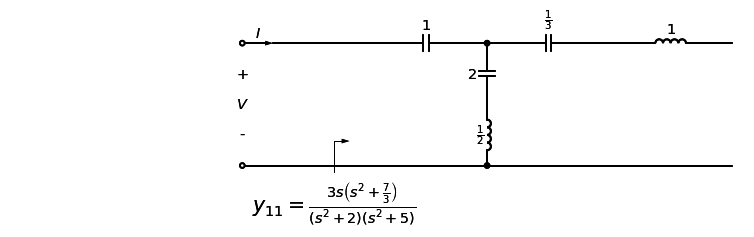

In [3]:
# Módulos importantantes
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor
import numpy as np

s = sp.symbols('s ', complex=True)

YY = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)

#Remuevo parcialmente el polo en el origen para llevar un cero a j1

Z2, Zc1 = tc2.remover_polo_dc(1/YY, omega_zero = 1 )

#Obtengo el valor del componente

C1 = 1/(s*Zc1)

#Remuevo el polo en j1

Y4, Yt2, L1, C2 = tc2.remover_polo_jw(1/Z2, isImpedance = False, omega = 1)

#Remuevo el polo del origen

Z6, Zc3 = tc2.remover_polo_dc(1/Y4)

#Obtengo el valor del componente

C3 = 1/(s*Zc3)

#Obtengo el ultimo componente

L2 = Z6/s

d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'y_{11}',  
                                          YY, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_serie(d, Capacitor, C1)
d = tc2.dibujar_tanque_derivacion(d, L1, C2)
d = tc2.dibujar_elemento_serie(d, Capacitor, C3)
d = tc2.dibujar_elemento_serie(d, Inductor, L2)

display(d)

<p style="border: ridge #FF4040 2px; text-align: left;font-weight: italic; font-size:15px;">
    Simulacion
</p>

<ol start="2">
    <li>        
    </li>    
</ol>

<img src="Simulacion2A.jpg" style="float: left;" width="800" height="100" alt="InternetCtrl">

<img src="Simulacion2B.jpg" style="float: left;" width="800" height="100" alt="InternetCtrl">